In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Markdown as Markdown, display

data = pd.read_csv("wijkbuurtkaart_for_eda.csv")

# High correlated columns
Let's create a correlation matrix and get the pairs of features which would show strong correlation (so they value of their correlation would be > 0.7):

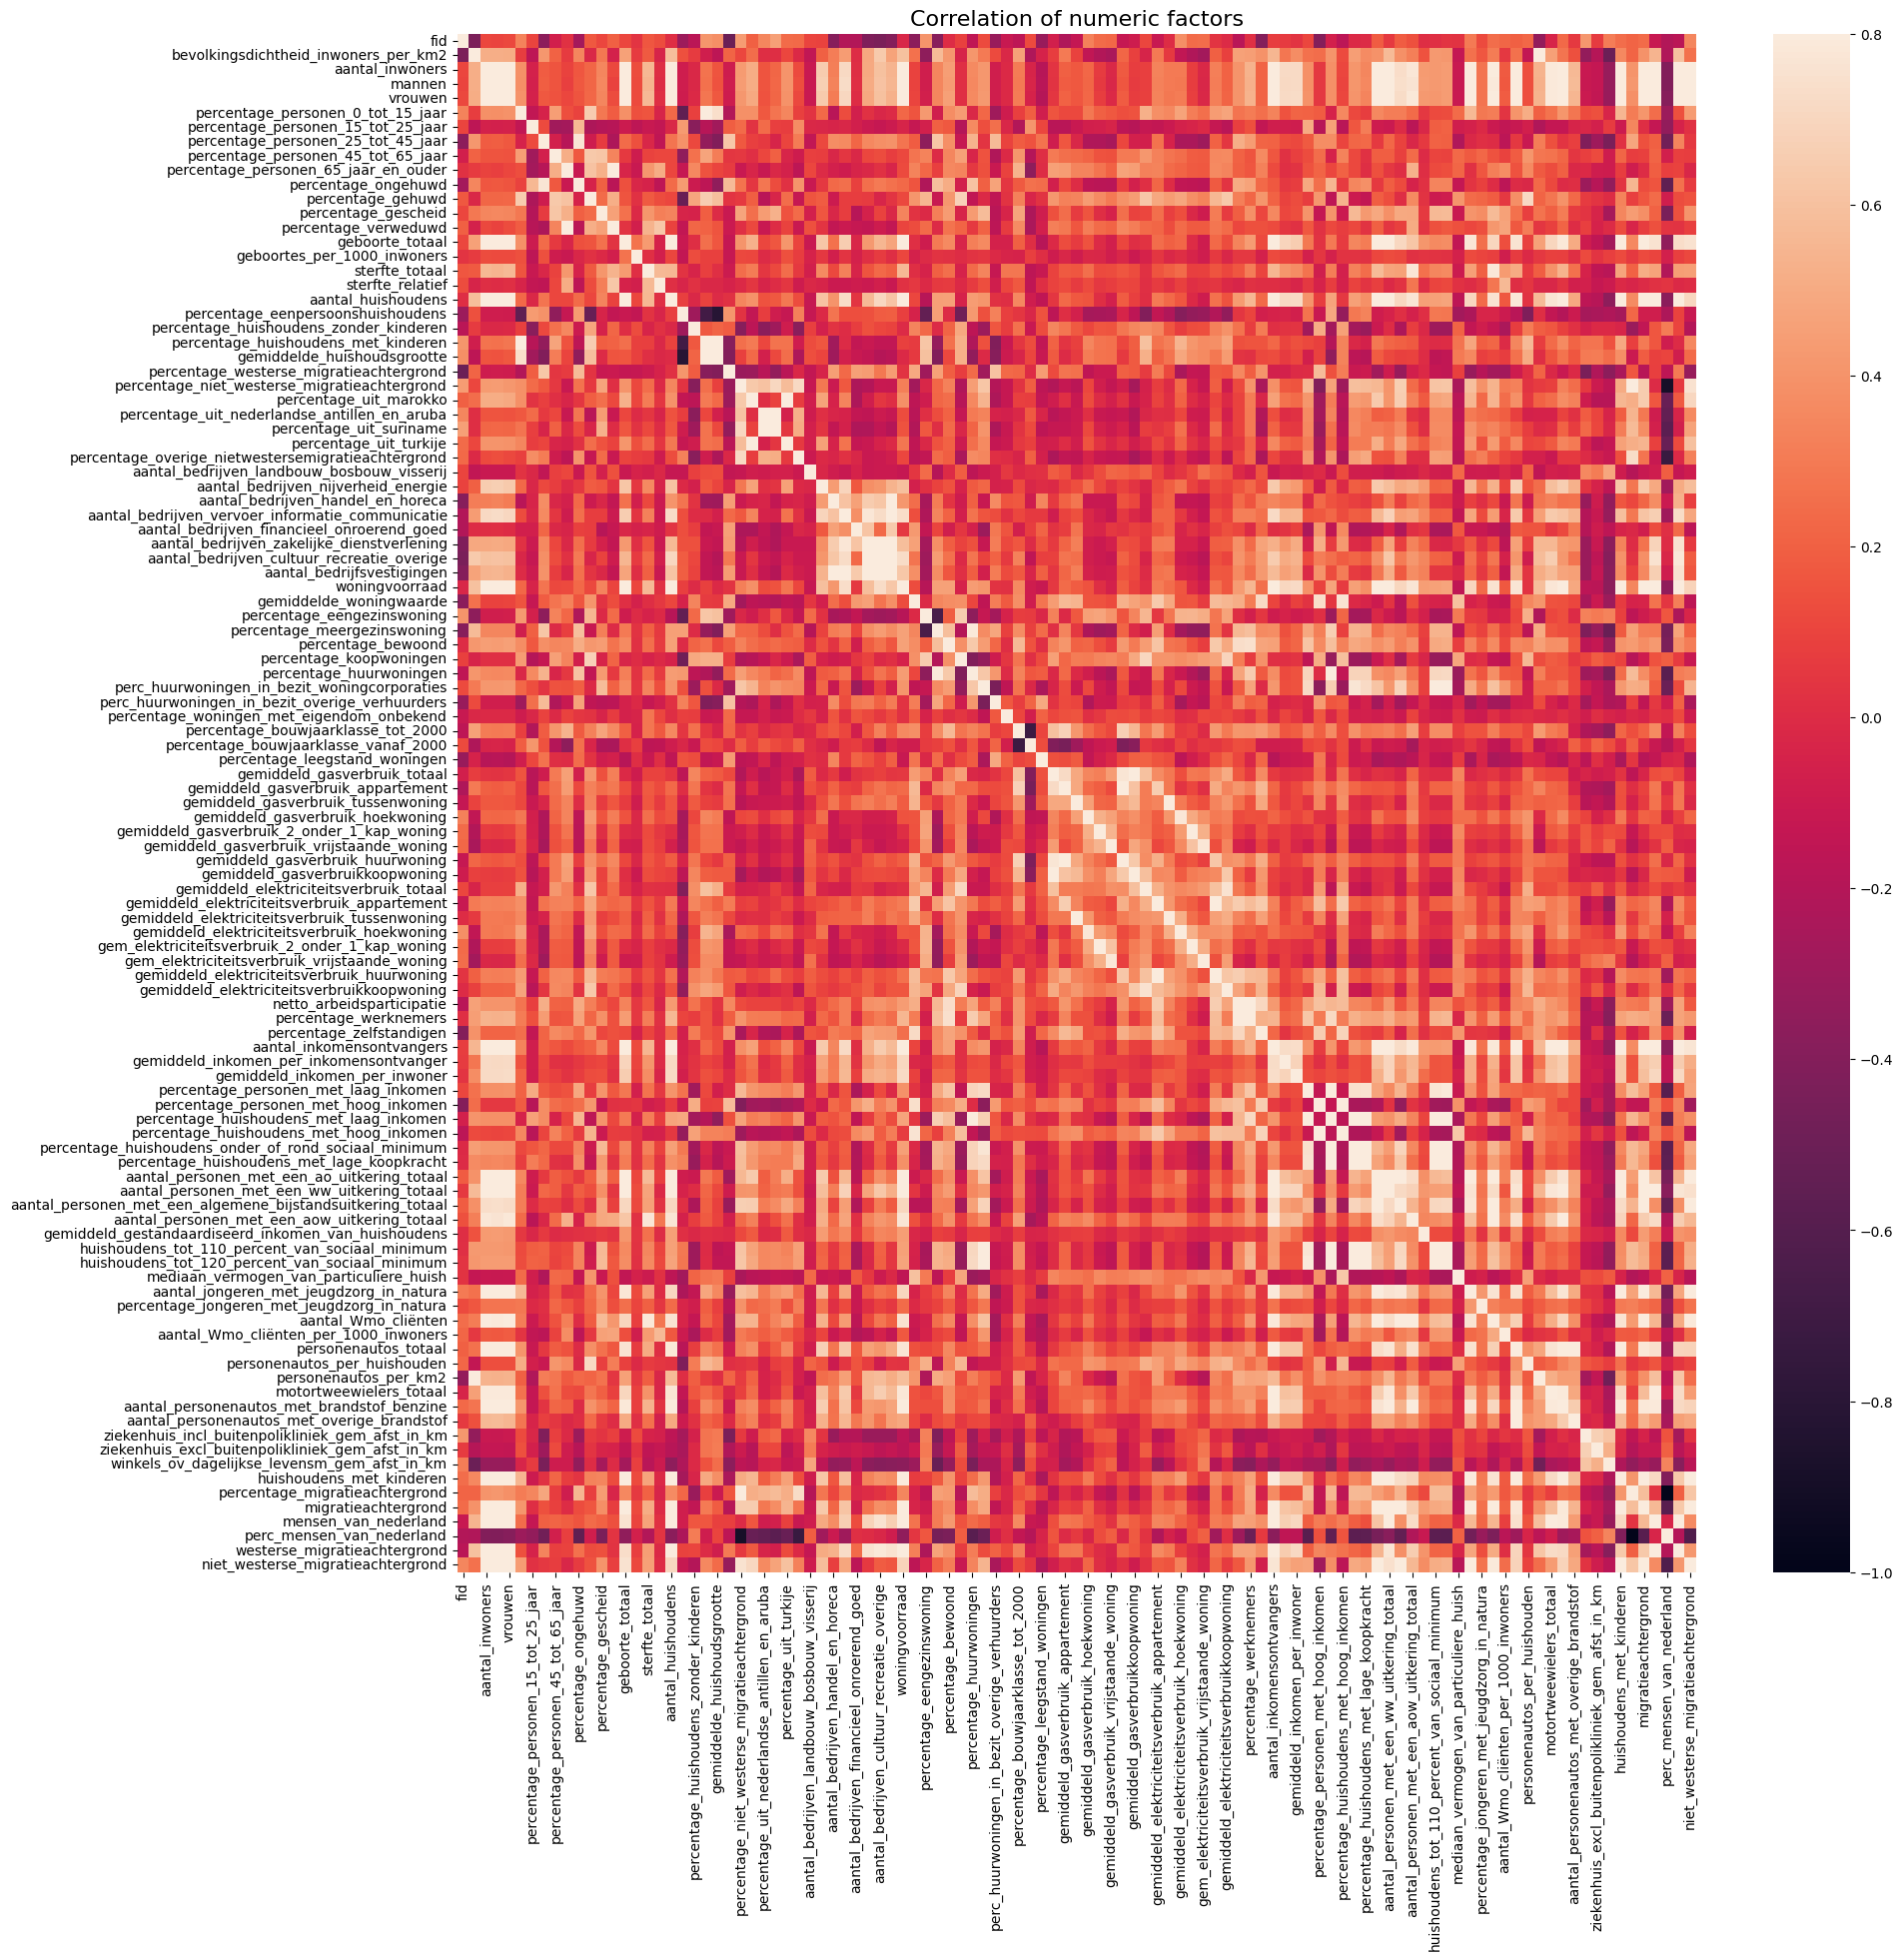

In [2]:
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
f, ax = plt.subplots(figsize = (20,20))
plt.title('Correlation of numeric factors', y = 1, size = 16)
_ = sns.heatmap(corr_matrix, vmax = .8, annot = False)

It's impossible to see anything on this matrix, because dataset have a lot of features. So, let's print the strong correlated pairs of columns:

In [3]:
def print_highly_correlated(df, features, threshold_down=0.7, threshold_up=1.0):
    """Prints highly correlated features pairs in the data frame (helpful for feature engineering)"""
    corr_df = df[features].corr()
    correlated_features = np.where((np.abs(corr_df) < threshold_up) & (np.abs(corr_df) > threshold_down)) # select ones above the abs threshold
    correlated_features = [(corr_df.iloc[x,y], x, y) for x, y in zip(*correlated_features) if x != y and x < y] # avoid duplication
    s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0])) # sort by correlation value
    if s_corr_list == []:
        print("There are no highly correlated features with correlation above", threshold_down)
    else:
        for v, i, j in s_corr_list:
            cols = df[features].columns
            print ("%s and %s = %.3f" % (corr_df.index[i], corr_df.columns[j], v))

In [4]:
columns = [ column for column in numeric_data.columns if column not in ['aantal_inwoners', 'vrouwen', 'mannen', 'woningvoorraad'] ]
print_highly_correlated(numeric_data, columns)

huishoudens_tot_110_percent_van_sociaal_minimum and huishoudens_tot_120_percent_van_sociaal_minimum = 0.996
percentage_huishoudens_onder_of_rond_sociaal_minimum and huishoudens_tot_110_percent_van_sociaal_minimum = 0.991
percentage_huishoudens_onder_of_rond_sociaal_minimum and huishoudens_tot_120_percent_van_sociaal_minimum = 0.981
aantal_huishoudens and aantal_inkomensontvangers = 0.979
personenautos_totaal and aantal_personenautos_met_brandstof_benzine = 0.976
migratieachtergrond and niet_westerse_migratieachtergrond = 0.965
percentage_huishoudens_met_lage_koopkracht and huishoudens_tot_110_percent_van_sociaal_minimum = 0.962
percentage_huishoudens_onder_of_rond_sociaal_minimum and percentage_huishoudens_met_lage_koopkracht = 0.959
aantal_bedrijven_zakelijke_dienstverlening and aantal_bedrijfsvestigingen = 0.952
percentage_huishoudens_met_lage_koopkracht and huishoudens_tot_120_percent_van_sociaal_minimum = 0.951
aantal_inkomensontvangers and aantal_personen_met_een_ww_uitkering_tota